## DSA5103 Assignment 1

#### Question 2: Matrix inverse

In [1]:
# (1) generate n x n matrix X
import numpy as np
n = 3
X = np.random.rand(n,n)
print(X)

[[0.20287213 0.85329389 0.31693621]
 [0.95897669 0.2832935  0.16028006]
 [0.73056863 0.64029331 0.00426889]]


In [2]:
# (2) A = I + X'X
A = np.identity(n) + X.transpose() * X
print(A)

[[1.0411571  0.81828895 0.23154365]
 [0.81828895 1.08025521 0.10262625]
 [0.23154365 0.10262625 1.00001822]]


In [4]:
# check if A is symmetric
(A.transpose() == A).all()

True

In [5]:
# check if A is positive definite
np.all(np.linalg.eigvals(A) > 0)

True

In [6]:
# (3) time of inverting the matrix
import time
n_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
invert_time = []
for n in n_list:
    x = np.random.rand(n, n)
    start = time.time()
    v_inverse = np.linalg.inv(x)
    i_time = time.time() - start
    invert_time.append(i_time)
print(invert_time)

[0.07905983924865723, 0.32193493843078613, 0.9079298973083496, 1.8321449756622314, 3.69840931892395, 6.0052490234375, 9.562077760696411, 14.242807865142822, 19.78295397758484, 25.912359952926636]


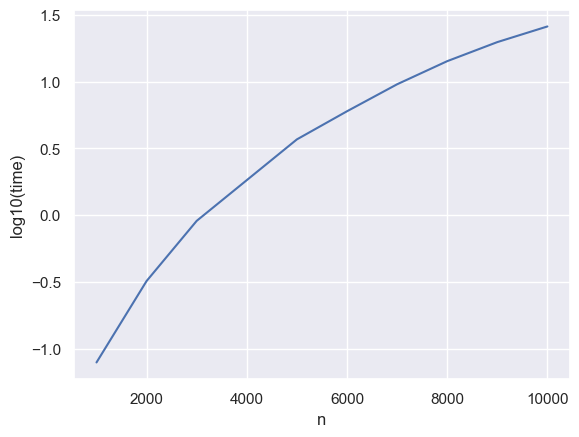

In [8]:
# plot time of inverting the matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
log_time = np.log10(invert_time)
sns.set_theme()
df = pd.DataFrame(list(zip(n_list, log_time)),
                 columns = ['n', 'log10(time)'])
sns.lineplot(data=df, x="n", y="log10(time)")
plt.show()

In [16]:
# (4) largest n my computer can handle is 30000
large_matrix = np.random.rand(30000,30000)
start = time.time()
large_inverse = np.linalg.inv(large_matrix)
time_interval = time.time() - start
print('time to invert 30k * 30k matrix in seconds: ', time_interval)

time to invert 30k * 30k matrix in seconds:  1098.8938179016113


#### Question 3: PCA

In [9]:
# (1) download dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target.astype('object')

y[y == 0] = 'setosa'
y[y == 1] = 'versicolor'
y[y == 2] = 'virginica'

iris_df = pd.DataFrame(X, 
                  columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
iris_df['species'] = y.tolist()
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# (2) normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_df_X = iris_df[['sepal length', 'sepal width', 'petal length', 'petal width']]
scaler.fit(iris_df_X)
scaled = scaler.fit_transform(iris_df_X)

scaled_iris_df = pd.DataFrame(scaled, columns=iris_df_X.columns)
scaled_iris_df['species'] = y.tolist()
scaled_iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [11]:
# (3) p x p covariance matrix
scaled_X_cov = np.cov(scaled, rowvar=False)
print(scaled_X_cov)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [12]:
# (4) compute eigenvalue decomposition
eig_values, eig_vectors = np.linalg.eig(scaled_X_cov)

# print values and corresponding vectors
print('eigenvalues D: ', '\n', eig_values)
print('eigenvectors Q: ', '\n', eig_vectors)

eigenvalues D:  
 [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvectors Q:  
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


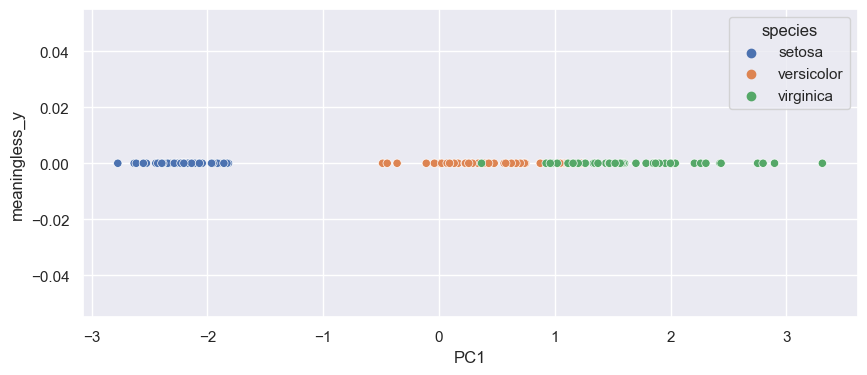

In [13]:
# (5) first principal component
from sklearn.decomposition import PCA
X_df = scaled_iris_df.drop(['species'],axis=1)
solo_pca = PCA(n_components=1)
X_new_1 = solo_pca.fit_transform(X_df)

new_df_1 = pd.DataFrame(X_new_1, columns = ['PC1'])
new_df_1['meaningless_y'] = 0
new_df_1['species'] = y.tolist()
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(x='PC1', y = 'meaningless_y', data=new_df_1, hue='species', 
                legend=True, ax=ax)
plt.show()

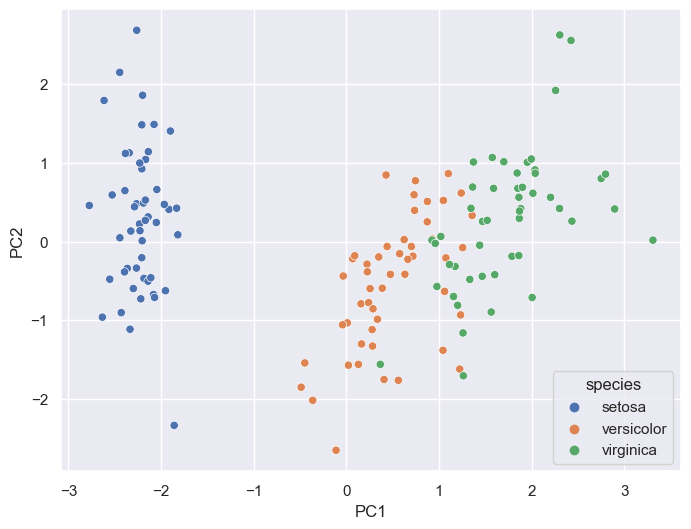

In [14]:
# (6) first two principal components
two_pca = PCA(n_components=2)
X_new_2 = two_pca.fit_transform(X_df)

new_df_2 = pd.DataFrame(X_new_2, columns = ['PC1', 'PC2'])
new_df_2['species'] = y.tolist()
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='PC1', y = 'PC2', data=new_df_2, hue='species', 
                legend=True, ax=ax)
plt.show()